# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

------------------------------------------------------------------------------

Dataset yang digunakan pada eksperimen ini adalah dataset Titanic – Machine Learning from Disaster.
Dataset ini diperoleh dari platform Kaggle dan bersifat public.

Link dataset:
https://www.kaggle.com/competitions/titanic

Dataset ini berisi informasi penumpang kapal Titanic dan digunakan untuk
memprediksi apakah seorang penumpang selamat atau tidak.

Target:
- Survived (0 = tidak selamat, 1 = selamat)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [6]:
# Library dasar
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan tampilan
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
from google.colab import files

uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [8]:
import pandas as pd

df = pd.read_csv("titanic.csv")

# Menampilkan 5 baris pertama
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [12]:
# Mengecek jumlah missing value tiap kolom
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
# Distribusi target
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


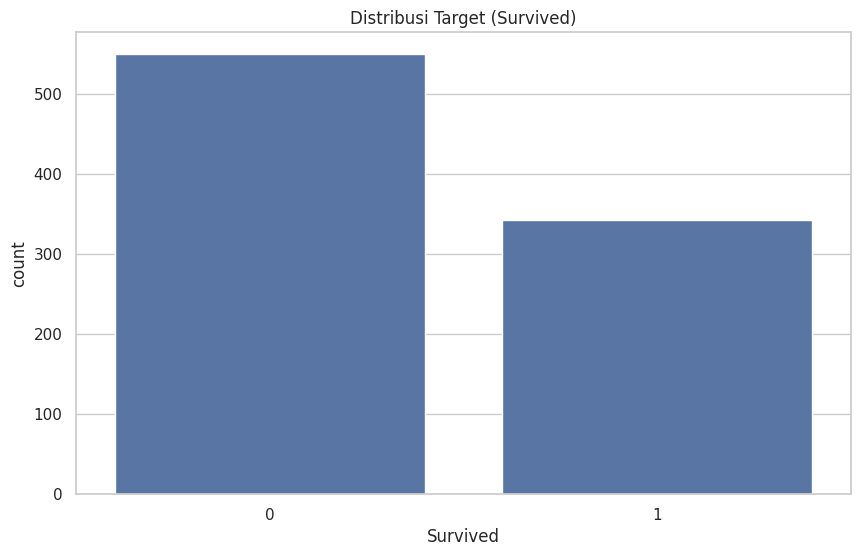

In [14]:
sns.countplot(x='Survived', data=df)
plt.title("Distribusi Target (Survived)")
plt.show()

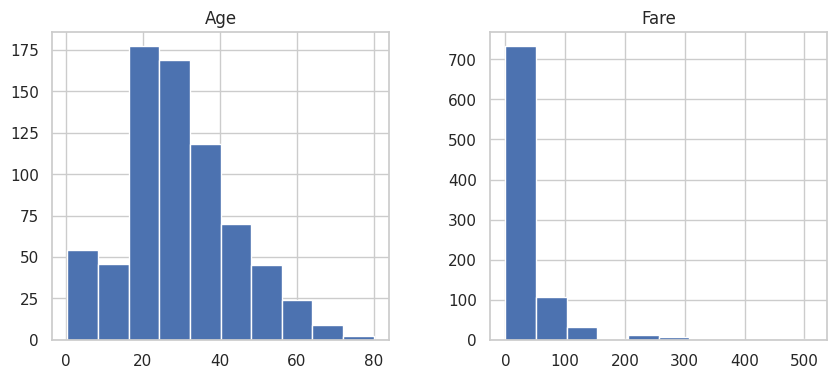

In [15]:
numerical_features = ['Age', 'Fare']

df[numerical_features].hist(figsize=(10, 4))
plt.show()

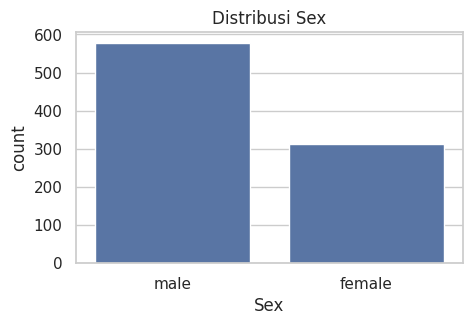

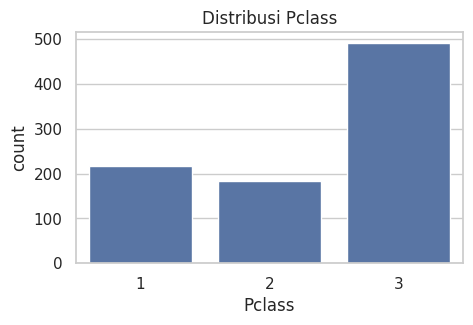

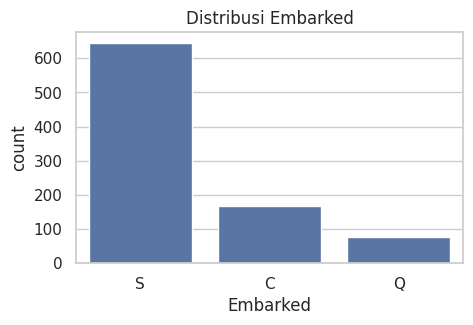

In [16]:
categorical_features = ['Sex', 'Pclass', 'Embarked']

for col in categorical_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.show()

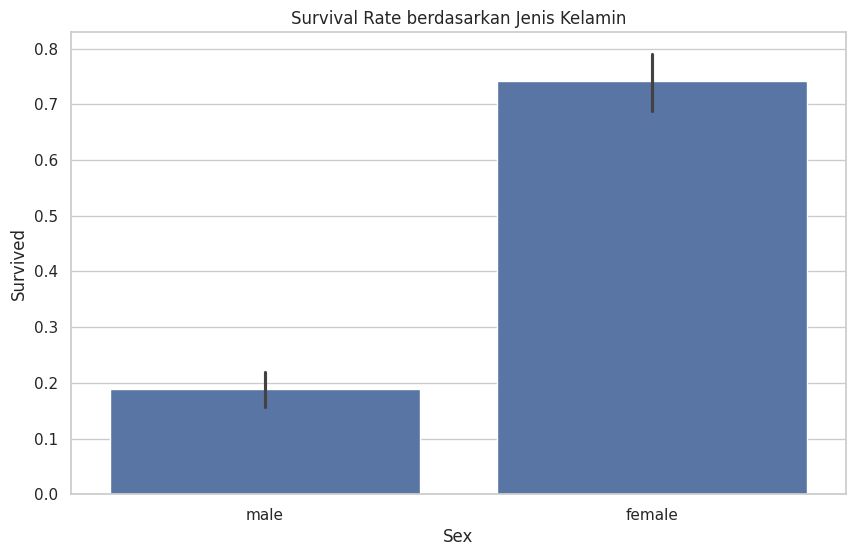

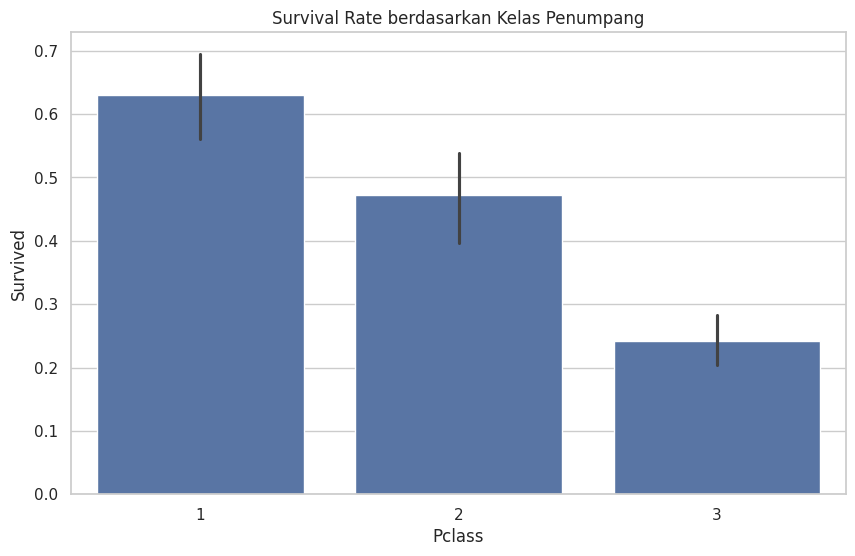

In [17]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate berdasarkan Jenis Kelamin")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate berdasarkan Kelas Penumpang")
plt.show()

Berdasarkan hasil Exploratory Data Analysis (EDA), diperoleh beberapa insight utama:
1. Dataset memiliki beberapa missing value, terutama pada fitur Age dan Cabin.
2. Target Survived tidak seimbang, dengan jumlah penumpang tidak selamat lebih banyak dibandingkan yang selamat.
3. Penumpang perempuan memiliki tingkat keselamatan lebih tinggi dibandingkan laki-laki.
4. Penumpang pada kelas ekonomi lebih tinggi (Pclass 1) memiliki peluang selamat yang lebih besar.
5. Fitur numerik seperti Age dan Fare memiliki distribusi yang beragam dan akan memerlukan preprocessing lebih lanjut.
Insight ini menjadi dasar dalam tahap preprocessing dan pemodelan selanjutnya.

Hasil EDA ini digunakan sebagai dasar dalam menentukan strategi preprocessing,
feature engineering, dan pemilihan model pada tahap selanjutnya.


Insight : Fitur Cabin dihapus karena memiliki proporsi missing value yang sangat tinggi, sementara fitur Age dan Embarked dilakukan imputasi untuk menjaga jumlah data dan stabilitas model.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# Menghapus kolom Cabin karena missing value terlalu tinggi
df = df.drop(columns=['Cabin'])

In [19]:
# Mengisi missing value Age dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [20]:
# Mengisi missing value Embarked dengan nilai yang paling sering muncul
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
# Mengecek kembali missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
# Mengubah teks menjadi angka
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [23]:
# Encoding fitur kategorikal Embarked
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [24]:
# Drop kolom yang tidak relevan
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [25]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df['Survived'] = y.values

processed_df.to_csv('titanic_preprocessed.csv', index=False)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **6. Modeling**

In [29]:
import numpy as np

# Mengganti NaN hasil scaling dengan 0
X_scaled = np.nan_to_num(X_scaled)

In [30]:
# Modeling - Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy Logistic Regression: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy Random Forest: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

